This script reads the Nc file for Mosart Discharge downloaded from Casper log-in

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."  

path2Create = r'C:/rezaul/1.academic/1.research/2.project/mrb/output/'
 
if not os.path.exists(path2Create):
    os.makedirs(path2Create)    
    
path2Save = 'C:/rezaul/1.academic/1.research/2.project/mrb/output/fig/disch/'

if not os.path.exists(path2Save):
    os.makedirs(path2Save)    

IMAGES_PATH = os.path.join(path2Save)
outputPath = os.path.join(path2Save)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import Libraries

In [2]:
# Common imports
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
#from osgeo import gdal # Import the GDAL library
#import gdal

import cmocean

#import matplotlib.pyplot as plt # Import the Matplotlib package
from matplotlib import pyplot as plt  # Import the Matplotlib package
from numpy import linspace # Import the Linspace numpy library
from numpy import meshgrid # Import the Meshgrid numpy library

#from init import *
import scipy.io as sio
# Common imports
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
#import scipy.io
from scipy.io import loadmat   # https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html
import xarray as xr


In [3]:
# Stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend

from netCDF4 import Dataset   # http://code.google.com/p/netcdf4-python/
from numpy.random import normal
from numpy import hstack

import math


In [4]:
# Plotting
import matplotlib.colors as colors
from copy import copy
import matplotlib.cm as cm
#from matplotlib_scalebar.scalebar import ScaleBar

import seaborn as sns
import matplotlib.gridspec as gridspec


In [5]:
# Projection
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package


In [6]:
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package
sf=shp.Reader('C:/rezaul/1.academic/1.research/1.data/shapeFile/missi/Miss_RiverBasin.shp')

## Basin shape files

In [7]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'


In [8]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)

In [9]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#
reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#

In [10]:
feature_Missi = sf_Missi.shapeRecords()[0]
print(feature_Missi)

feature_Arkansas = sf_Arkansas.shapeRecords()[0]
print(feature_Arkansas)

feature_Missouri = sf_Missouri.shapeRecords()[0]
print(feature_Missouri)

feature_Ohio = sf_Ohio.shapeRecords()[0]
print(feature_Ohio)

## Read Nc file

In [11]:
filePath = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon'
fileName = 'b.e21.BHISTcmip6.f09_g17.LE2-1001.001.clm2.h0.QOVER.185001-185912.nc'
ncFile_param = str(filePath) + '/' + str(fileName)
print(ncFile_param)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.clm2.h0.QOVER.185001-185912.nc


In [12]:
file_param = Dataset(ncFile_param, mode='r')
file_param

lons = file_param.variables['lon'][:]
lats = file_param.variables['lat'][:]

In [13]:
print(lats[0:4])
print(lons[0:4])

[-90.       -89.057594 -88.11518  -87.172775]
[0.   1.25 2.5  3.75]


In [14]:
file_xr  = xr.open_dataset(ncFile_param) 
file_xr

C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:       (levgrnd: 25, levlak: 10, levdcmp: 25, lon: 288, lat: 192,
                   time: 120, hist_interval: 2)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * lon           (lon) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lat           (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * time          (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: hist_interval
Data variables: (12/22)
    area          (lat, lon) float32 ...
    landfrac      (lat, lon) float32 ...
    landmask      (lat, lon) float64 ...
    pftmask       (lat, lon) float64 ...
    nbedrock      (lat, lon) float64 ...
    ZSOI          (levgrnd, lat, lon) float32 ...
    ...            ...
    mscur         (time) float64 ...
    nstep         (time) float64 ...
    time_bounds   (time, hist_interval) object ...
    date_written  (time) object ...
    time_written  (time) object ...
    QOVER         (time, lat, lon) float32 ...
Attributes: (12/100)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 01/31/20 16:34:57
    source:                                    Community Land Model CLM4.0
    hostname:                                  aleph
    ...                                        ...
    cft_irrigated_switchgrass:                 60
    cft_tropical_corn:                         61
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1

In [15]:
param_val = file_xr['QOVER']

print(param_val.shape)
print(param_val)

(120, 192, 288)
<xarray.DataArray 'QOVER' (time: 120, lat: 192, lon: 288)>
[6635520 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Attributes:
    long_name:     surface runoff
    units:         mm/s
    cell_methods:  time: mean


In [16]:

file_paramHist = Dataset(ncFile_param, mode='r')
file_paramHist

lons = file_paramHist.variables['lon'][:]
lats = file_paramHist.variables['lat'][:]
times = file_paramHist.variables['time'][:]
ntim = times.shape[0]
print(ntim)

time = np.arange(ntim)
time

param_valHist = file_paramHist.variables['QOVER'][:]*86400*30
print(param_valHist.shape)
print('')    
    

120
(120, 192, 288)



## Setting US boundaries

In [17]:
# Save only U.S. 
latboundsUs = [ 25 , 55]
lonboundsUs = [230 , 300]

In [18]:
# latitude lower and upper index
latli = np.argmin( np.abs( lats - latboundsUs[0] ) )
latui = np.argmin( np.abs( lats - latboundsUs[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonboundsUs[0] ) )
lonui = np.argmin( np.abs( lons - lonboundsUs[1] ) )  

In [19]:
print(latli, latui)
print(lonli, lonui)

122 154
184 240


In [20]:
param_val_sample_Us = param_val[:, latli:latui , lonli:lonui]
print(param_val_sample_Us.shape)

(120, 32, 56)


In [21]:
t,y_Us,x_Us = param_val_sample_Us.shape
print(y_Us)
print(x_Us)
print(t)

32
56
120


In [22]:
lats_Us = lats[latli:latui]
print(lats_Us)

[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


In [23]:
lons_Us = lons[lonli:lonui]
print(lons_Us)

[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


## Using data fromGLADE access to NCAR HPC

### Lat Lon info from CESM2

In [24]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/latsUsArr.npy'
latUs_cesm2 = np.load(file_LatUs)
print(latUs_cesm2.shape)
print(latUs_cesm2)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


In [25]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/lonsUsArr.npy'
lonUs_cesm2 = np.load(file_LonUs)
print(lonUs_cesm2.shape)
print(lonUs_cesm2)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


### Historical (1850-2014): 1980 months

In [26]:
file_hist_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/monRunoffUsHistEnsMems.npy'

file_hist_ensMems_loaded = np.load(file_hist_ensMems)
print(file_hist_ensMems_loaded.shape)
maxVal = np.nanmax(file_hist_ensMems_loaded)
maxVal

(1980, 32, 56, 50)


9.999999616903162e+35

## Historical years and 3 time periods (i.e., Era) in Scenario years

In [27]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


In [28]:
histYrSt = 1850
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [29]:
refPeriodStepSt = (histYrSelSt - histYrSt)*nMonsPerYr
print(refPeriodStepSt)

960


In [30]:
file_histSel_ensMems_loaded = file_hist_ensMems_loaded[refPeriodStepSt::, :, :, :]

print(file_histSel_ensMems_loaded.shape)

(1020, 32, 56, 50)


### Scenario (2015-2100)

In [31]:
file_scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/monRunoffUsScenEnsMems.npy'

file_scen_ensMems_loaded = np.load(file_scen_ensMems)
print(file_scen_ensMems_loaded.shape)
maxVal = np.nanmax(file_scen_ensMems_loaded)
maxVal

(1032, 32, 56, 50)


9.999999616903162e+35

## Concatenate two data arrays

In [32]:
print(file_histSel_ensMems_loaded.shape)
print(file_scen_ensMems_loaded.shape)


(1020, 32, 56, 50)
(1032, 32, 56, 50)


In [33]:
param_histSel_scen_ensMems_Us = np.concatenate((file_histSel_ensMems_loaded, file_scen_ensMems_loaded), axis=0)
print(param_histSel_scen_ensMems_Us.shape)

(2052, 32, 56, 50)


## The two files (Hist selected and Scen)

In [34]:
print(file_hist_ensMems_loaded.shape)
print(file_scen_ensMems_loaded.shape)

(1980, 32, 56, 50)
(1032, 32, 56, 50)


In [35]:
file_hist_ensMean_loaded = np.nanmean(file_hist_ensMems_loaded, axis=3)
print(file_hist_ensMean_loaded.shape)

file_scen_ensMean_loaded = np.nanmean(file_scen_ensMems_loaded, axis=3)
print(file_scen_ensMean_loaded.shape)


(1980, 32, 56)
(1032, 32, 56)


## The four time slots

In [36]:

histYrSt = 1850

refPeriodYrSt = 1971
refPeriodYrEnd = 2000
#++++++++++++++++++++++++

scenYrSt = 2015
scenEraOneYrEnd = 2044

scenEraTwoYrSt = 2045
scenEraTwoYrEnd = 2074

scenEraThreeYrSt = 2075
scenYrEnd = 2100
#


## tsteps

In [37]:
nMonsPerYr = 12     # 
print(nMonsPerYr)

12


## Reference Period

In [38]:
refPeriodStepSt = (refPeriodYrSt - histYrSt)*nMonsPerYr
refPeriodStepEnd = (refPeriodYrEnd - histYrSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2001
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

1452 1814
362


## Era 1

In [39]:
scenEraOneStepSt = 0
scenEraOneStepEnd = (scenEraOneYrEnd - scenYrSt + 1)*nMonsPerYr + 2  # To include Jan and Feb of the following year in 2045
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

0 362
362


## Era 2

In [40]:
scenEraTwoStepSt = (scenEraTwoYrSt - scenYrSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraTwoYrEnd - scenYrSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2075
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

360 722
362


## Era 3

In [41]:
scenEraThreeStepSt = (scenEraThreeYrSt - scenYrSt)*nMonsPerYr
scenEraThreeStepEnd = (scenYrEnd - scenYrSt + 1)*nMonsPerYr    # Data ends at Dec, 2100
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

720 1032
312


## Subsetting the data into different periods / Eras

In [42]:
print(file_hist_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)

(1980, 32, 56)
(1032, 32, 56)


In [43]:
param_refPeriod_Us_ensmean = file_hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

(362, 32, 56)


In [44]:
param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

(362, 32, 56)


In [45]:
param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

(362, 32, 56)


In [46]:
param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Seasons start here

In [47]:
print(nMonsPerYr)

12


In [48]:
param_refPeriod_Us_ensmean = file_hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(362, 32, 56)
(362, 32, 56)
(362, 32, 56)
(312, 32, 56)


## MAM

## ref Period

In [49]:
mamMonSt = 3
mamMonMid = 4
mamMonEnd = 5

In [50]:

param_mamSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_refPeriod_Us_ensmean.shape)

param_mamMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_refPeriod_Us_ensmean.shape)

param_mamEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [51]:
param_mamSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamSt_refPeriod_Us_ensmean, axis = 0)
print(param_mamSt_refPeriod_Us_ensmean_timeAvg.shape)

param_mamMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamMid_refPeriod_Us_ensmean, axis = 0)
print(param_mamMid_refPeriod_Us_ensmean_timeAvg.shape)

param_mamEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_refPeriod_Us_ensmean, axis = 0)
print(param_mamEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [52]:
param_mamTot_refPeriod_Us_ensmean_timeAvg = (param_mamSt_refPeriod_Us_ensmean_timeAvg+param_mamMid_refPeriod_Us_ensmean_timeAvg+param_mamEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_mamTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [53]:

param_mamSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraOne_Us_ensmean.shape)

param_mamMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraOne_Us_ensmean.shape)

param_mamEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [54]:
param_mamSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraOne_Us_ensmean, axis = 0)
print(param_mamSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraOne_Us_ensmean, axis = 0)
print(param_mamMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [55]:
param_mamTot_scenEraOne_Us_ensmean_timeAvg = (param_mamSt_scenEraOne_Us_ensmean_timeAvg+param_mamMid_scenEraOne_Us_ensmean_timeAvg+param_mamEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [56]:

param_mamSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraTwo_Us_ensmean.shape)

param_mamMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraTwo_Us_ensmean.shape)

param_mamEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [57]:
param_mamSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [58]:
param_mamTot_scenEraTwo_Us_ensmean_timeAvg = (param_mamSt_scenEraTwo_Us_ensmean_timeAvg+param_mamMid_scenEraTwo_Us_ensmean_timeAvg+param_mamEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [59]:

param_mamSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraThree_Us_ensmean.shape)

param_mamMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraThree_Us_ensmean.shape)

param_mamEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [60]:
param_mamSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraThree_Us_ensmean, axis = 0)
print(param_mamSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraThree_Us_ensmean, axis = 0)
print(param_mamMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [61]:
param_mamTot_scenEraThree_Us_ensmean_timeAvg = (param_mamSt_scenEraThree_Us_ensmean_timeAvg+param_mamMid_scenEraThree_Us_ensmean_timeAvg+param_mamEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [62]:
param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraOne_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [63]:
param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraTwo_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [64]:
param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraThree_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (MAM)

## Writing in an Xarray Data array

In [65]:
y_Us, x_Us = param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape
print(y_Us)
print(x_Us)

32
56


In [66]:
param_mamTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_mamTot_scenEraOne_diff_Us_xarray.shape)
print(param_mamTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.9120448 , -12.18976663, ...,  15.24364421,
          4.61139867,   4.94252997],
       [ -0.77786865, -13.95135007,   1.00666622, ...,   7.17832758,
         14.09865575,   5.02086732],
       [-12.76150606,  -5.42762604,  -2.19596126, ...,   2.55376872,
          2.95634917,   6.47137849]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [67]:
param_mamTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_mamTot_scenEraTwo_diff_Us_xarray.shape)
print(param_mamTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.96206894, -26.60305643, ...,   8.2957409 ,
          6.61781188,   5.76169181],
       [ -0.20210762, -24.0562523 ,  -8.23598994, ...,  13.45861832,
          8.32743757,   4.74545419],
       [-21.12066657, -15.82041546,  -8.30944551, ...,   7.44396194,
         10.46712169,   6.60410809]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [68]:
param_mamTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_mamTot_scenEraThree_diff_Us_xarray.shape)
print(param_mamTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.86455861, -38.04536682, ...,   9.1477767 ,
          6.43753085,   4.80633211],
       [ -0.12537813, -29.65745566, -27.48350552, ...,  16.83451611,
         10.5701915 ,   4.87555052],
       [-26.12578317, -32.83673818, -20.69578101, ...,   8.4290899 ,
         13.81594983,   7.80306458]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [69]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [70]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [71]:
param_mamTot_scenEraOne_diff_masked_Missi = param_mamTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraOne_diff_masked_Missi.shape)
print(param_mamTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [72]:
param_mamTot_scenEraTwo_diff_masked_Missi = param_mamTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraTwo_diff_masked_Missi.shape)
print(param_mamTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [73]:
param_mamTot_scenEraThree_diff_masked_Missi = param_mamTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraThree_diff_masked_Missi.shape)
print(param_mamTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [74]:
maxVal_mamTot_diff_masked_scenEraOne = np.nanmax(param_mamTot_scenEraOne_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraOne)
minVal_mamTot_diff_masked_scenEraOne = np.nanmin(param_mamTot_scenEraOne_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraOne)

1.147689935452945
-6.139695568655892


In [75]:
maxVal_mamTot_diff_masked_scenEraTwo = np.nanmax(param_mamTot_scenEraTwo_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraTwo)
minVal_mamTot_diff_masked_scenEraTwo = np.nanmin(param_mamTot_scenEraTwo_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraTwo)

3.554820162304509
-9.909692774429686


In [76]:
maxVal_mamTot_diff_masked_scenEraThree = np.nanmax(param_mamTot_scenEraThree_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraThree)
minVal_mamTot_diff_masked_scenEraThree = np.nanmin(param_mamTot_scenEraThree_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraThree)

6.96473735613948
-12.428490546442108


## Plotting

In [77]:

latUsMin = lats_Us.min()     # = or = latsCfsDnSc
print(latUsMin)

latUsMax = lats_Us.max()
print(latUsMax)

lonUsMin = lons_Us.min()
print(lonUsMin)

lonUsMax = lons_Us.max()
print(lonUsMax)

24.973822
54.18848
230.0
298.75


In [78]:
extentUs = [lonUsMin, lonUsMax, latUsMin, latUsMax]
print(extentUs)

[230.0, 298.75, 24.973822, 54.18848]


In [79]:
x_Us = linspace(lonUsMin, lonUsMax, x_Us)
y_Us = linspace(latUsMin, latUsMax, y_Us)
print(x_Us)
print(y_Us)

# Create the rectangular grid out of these values
xx_Us, yy_Us = meshgrid(x_Us, y_Us)


[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
[24.97382164 25.91622999 26.85863833 27.80104668 28.74345503 29.68586337
 30.62827172 31.57068006 32.51308841 33.45549676 34.3979051  35.34031345
 36.2827218  37.22513014 38.16753849 39.10994684 40.05235518 40.99476353
 41.93717187 42.87958022 43.82198857 44.76439691 45.70680526 46.64921361
 47.59162195 48.5340303  49.47643865 50.41884699 51.36125534 52.30366368
 53.24607203 54.18848038]


In [80]:
vmin_mamTot_scenEraOne = np.floor(minVal_mamTot_diff_masked_scenEraOne)
vmax_mamTot_scenEraOne = np.ceil(maxVal_mamTot_diff_masked_scenEraOne)
print(vmin_mamTot_scenEraOne)
print(vmax_mamTot_scenEraOne)

-7.0
2.0


In [81]:
vmin_mamTot_scenEraTwo = np.floor(minVal_mamTot_diff_masked_scenEraTwo)
vmax_mamTot_scenEraTwo = np.ceil(maxVal_mamTot_diff_masked_scenEraTwo)
print(vmin_mamTot_scenEraTwo)
print(vmax_mamTot_scenEraTwo)

-10.0
4.0


In [82]:
vmin_mamTot_scenEraThree = np.floor(minVal_mamTot_diff_masked_scenEraThree)
vmax_mamTot_scenEraThree = np.ceil(maxVal_mamTot_diff_masked_scenEraThree)
print(vmin_mamTot_scenEraThree)
print(vmax_mamTot_scenEraThree)

-13.0
7.0


In [83]:
nDiv_mamTot_scenEraOne = int(vmax_mamTot_scenEraOne - vmin_mamTot_scenEraOne + 1)
print(nDiv_mamTot_scenEraOne)
#36

10


In [84]:
nDiv_mamTot_scenEraTwo = int(vmax_mamTot_scenEraTwo - vmin_mamTot_scenEraTwo + 1)
print(nDiv_mamTot_scenEraTwo)
#52

15


In [85]:

nDiv_mamTot_scenEraThree = int(vmax_mamTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
print(nDiv_mamTot_scenEraThree)
#77

21


## JJA

## ref Period

In [86]:
jjaMonSt = 6
jjaMonMid = 7
jjaMonEnd = 8

In [87]:

param_jjaSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_refPeriod_Us_ensmean.shape)

param_jjaMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_refPeriod_Us_ensmean.shape)

param_jjaEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [88]:
param_jjaSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_refPeriod_Us_ensmean, axis = 0)
print(param_jjaSt_refPeriod_Us_ensmean_timeAvg.shape)

param_jjaMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_refPeriod_Us_ensmean, axis = 0)
print(param_jjaMid_refPeriod_Us_ensmean_timeAvg.shape)

param_jjaEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_refPeriod_Us_ensmean, axis = 0)
print(param_jjaEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [89]:
param_jjaTot_refPeriod_Us_ensmean_timeAvg = (param_jjaSt_refPeriod_Us_ensmean_timeAvg+param_jjaMid_refPeriod_Us_ensmean_timeAvg+param_jjaEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_jjaTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [90]:

param_jjaSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraOne_Us_ensmean.shape)

param_jjaMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraOne_Us_ensmean.shape)

param_jjaEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [91]:
param_jjaSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [92]:
param_jjaTot_scenEraOne_Us_ensmean_timeAvg = (param_jjaSt_scenEraOne_Us_ensmean_timeAvg+param_jjaMid_scenEraOne_Us_ensmean_timeAvg+param_jjaEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2


In [93]:

param_jjaSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraTwo_Us_ensmean.shape)

param_jjaMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraTwo_Us_ensmean.shape)

param_jjaEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [94]:
param_jjaSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [95]:
param_jjaTot_scenEraTwo_Us_ensmean_timeAvg = (param_jjaSt_scenEraTwo_Us_ensmean_timeAvg+param_jjaMid_scenEraTwo_Us_ensmean_timeAvg+param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [96]:

param_jjaSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraThree_Us_ensmean.shape)

param_jjaMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraThree_Us_ensmean.shape)

param_jjaEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [97]:
param_jjaSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [98]:
param_jjaTot_scenEraThree_Us_ensmean_timeAvg = (param_jjaSt_scenEraThree_Us_ensmean_timeAvg+param_jjaMid_scenEraThree_Us_ensmean_timeAvg+param_jjaEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [99]:
param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraOne_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [100]:
param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraTwo_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [101]:
param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraThree_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)


(32, 56)


## Basin Mask (JJA)

## Writing in an Xarray Data array

In [102]:
param_jjaTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_jjaTot_scenEraOne_diff_Us_xarray.shape)
print(param_jjaTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -2.69499197, -11.65252254, ..., -10.44239402,
        -11.43491278,  -7.58073101],
       [ -2.35897892,  -5.30854684, -21.36360706, ...,   9.82134145,
         -2.05165116, -15.4151537 ],
       [ -4.00759638, -14.34224074,  -8.11019851, ...,   4.09731352,
          8.24151976, -11.19343601]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [103]:
param_jjaTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_jjaTot_scenEraTwo_diff_Us_xarray.shape)
print(param_jjaTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -5.04908471, -17.13012021, ..., -24.29634502,
        -17.61328277, -10.97022885],
       [ -4.80910171,  -8.66817151, -33.55730831, ...,  -7.58373007,
        -22.39957785, -21.97785814],
       [ -7.66157735, -23.42503506, -13.34398164, ...,  -2.25593209,
          0.48811055, -15.36832417]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [104]:
param_jjaTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_jjaTot_scenEraThree_diff_Us_xarray.shape)
print(param_jjaTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -6.99141654, -19.66565945, ..., -29.12264704,
        -22.74632732, -12.20551493],
       [ -6.83512516, -11.26003905, -38.12337795, ..., -23.62450479,
        -30.47304843, -26.50495566],
       [-10.45342361, -27.38514515, -15.56724088, ..., -10.90866199,
        -17.76011168, -19.23887452]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [105]:
param_jjaTot_scenEraOne_diff_masked_Missi = param_jjaTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraOne_diff_masked_Missi.shape)
print(param_jjaTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [106]:
param_jjaTot_scenEraTwo_diff_masked_Missi = param_jjaTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraTwo_diff_masked_Missi.shape)
print(param_jjaTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [107]:
param_jjaTot_scenEraThree_diff_masked_Missi = param_jjaTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraThree_diff_masked_Missi.shape)
print(param_jjaTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [108]:
maxVal_jjaTot_diff_masked_scenEraOne = np.nanmax(param_jjaTot_scenEraOne_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraOne)
minVal_jjaTot_diff_masked_scenEraOne = np.nanmin(param_jjaTot_scenEraOne_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraOne)

1.2047263800614019
-1.6520128626343649


In [109]:
maxVal_jjaTot_diff_masked_scenEraTwo = np.nanmax(param_jjaTot_scenEraTwo_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraTwo)
minVal_jjaTot_diff_masked_scenEraTwo = np.nanmin(param_jjaTot_scenEraTwo_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraTwo)

1.6069702519107523
-2.281683705924479


In [110]:
maxVal_jjaTot_diff_masked_scenEraThree = np.nanmax(param_jjaTot_scenEraThree_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraThree)
minVal_jjaTot_diff_masked_scenEraThree = np.nanmin(param_jjaTot_scenEraThree_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraThree)

1.5582050463225148
-2.8551915421622454


In [111]:
vmin_jjaTot_scenEraThree = np.floor(minVal_jjaTot_diff_masked_scenEraThree)
vmax_jjaTot_scenEraThree = np.ceil(maxVal_jjaTot_diff_masked_scenEraThree)
print(vmin_jjaTot_scenEraThree)
print(vmax_jjaTot_scenEraThree)

-3.0
2.0


In [112]:
nDiv_jjaTot_scenEraThree = int(vmax_jjaTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_jjaTot_scenEraThree)
#44

6


## SON

## ref Period


In [113]:
sonMonSt = 9
sonMonMid = 10
sonMonEnd = 11

In [114]:

param_sonSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_refPeriod_Us_ensmean.shape)

param_sonMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_refPeriod_Us_ensmean.shape)

param_sonEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [115]:
param_sonSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonSt_refPeriod_Us_ensmean, axis = 0)
print(param_sonSt_refPeriod_Us_ensmean_timeAvg.shape)

param_sonMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonMid_refPeriod_Us_ensmean, axis = 0)
print(param_sonMid_refPeriod_Us_ensmean_timeAvg.shape)

param_sonEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_refPeriod_Us_ensmean, axis = 0)
print(param_sonEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [116]:
param_sonTot_refPeriod_Us_ensmean_timeAvg = (param_sonSt_refPeriod_Us_ensmean_timeAvg+param_sonMid_refPeriod_Us_ensmean_timeAvg+param_sonEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_sonTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [117]:

param_sonSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraOne_Us_ensmean.shape)

param_sonMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraOne_Us_ensmean.shape)

param_sonEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [118]:
param_sonSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraOne_Us_ensmean, axis = 0)
print(param_sonSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraOne_Us_ensmean, axis = 0)
print(param_sonMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [119]:
param_sonTot_scenEraOne_Us_ensmean_timeAvg = (param_sonSt_scenEraOne_Us_ensmean_timeAvg+param_sonMid_scenEraOne_Us_ensmean_timeAvg+param_sonEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [120]:

param_sonSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraTwo_Us_ensmean.shape)

param_sonMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraTwo_Us_ensmean.shape)

param_sonEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [121]:
param_sonSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [122]:
param_sonTot_scenEraTwo_Us_ensmean_timeAvg = (param_sonSt_scenEraTwo_Us_ensmean_timeAvg+param_sonMid_scenEraTwo_Us_ensmean_timeAvg+param_sonEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [123]:

param_sonSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraThree_Us_ensmean.shape)

param_sonMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraThree_Us_ensmean.shape)

param_sonEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [124]:
param_sonSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraThree_Us_ensmean, axis = 0)
print(param_sonSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraThree_Us_ensmean, axis = 0)
print(param_sonMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [125]:
param_sonTot_scenEraThree_Us_ensmean_timeAvg = (param_sonSt_scenEraThree_Us_ensmean_timeAvg+param_sonMid_scenEraThree_Us_ensmean_timeAvg+param_sonEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [126]:
param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraOne_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [127]:
param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraTwo_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [128]:
param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraThree_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (SON)

## Writing in an Xarray Data array

In [129]:
param_sonTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_sonTot_scenEraOne_diff_Us_xarray.shape)
print(param_sonTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   3.73112703,   7.70753073, ..., -14.15372705,
         -1.51804814,   0.91147778],
       [  3.6311979 ,   6.4529642 ,   9.09217872, ...,   4.82765223,
         -2.94639692, -18.35488975],
       [  6.72084867,   8.70928601,   5.26353508, ...,   4.09381976,
          5.22463344,  -8.18416408]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [130]:
param_sonTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_sonTot_scenEraTwo_diff_Us_xarray.shape)
print(param_sonTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  10.60744753,  16.23059873, ..., -24.88351061,
         -0.94414947,   2.17108941],
       [ 10.38176591,  14.97810143,  19.1065819 , ..., -18.40028873,
        -24.48028462, -19.21801895],
       [ 15.3145163 ,  18.35074006,  11.80333152, ...,  -7.4371968 ,
        -12.97978082,  -7.84948261]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [131]:
param_sonTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_sonTot_scenEraThree_diff_Us_xarray.shape)
print(param_sonTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  17.65020382,  22.43262722, ..., -23.93625071,
         -0.357895  ,   4.0634441 ],
       [ 17.59267199,  23.04097608,  26.81634491, ..., -21.34016718,
        -24.07733969, -18.47175452],
       [ 23.45966154,  26.53020651,  17.58455054, ..., -10.39315729,
        -18.88910852,  -6.72772173]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [132]:
param_sonTot_scenEraOne_diff_masked_Missi = param_sonTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraOne_diff_masked_Missi.shape)
print(param_sonTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [133]:
param_sonTot_scenEraTwo_diff_masked_Missi = param_sonTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraTwo_diff_masked_Missi.shape)
print(param_sonTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [134]:
param_sonTot_scenEraThree_diff_masked_Missi = param_sonTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraThree_diff_masked_Missi.shape)
print(param_sonTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [135]:
maxVal_sonTot_diff_masked_scenEraOne = np.nanmax(param_sonTot_scenEraOne_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraOne)
minVal_sonTot_diff_masked_scenEraOne = np.nanmin(param_sonTot_scenEraOne_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraOne)

0.9910777787367806
-0.47344384995465916


In [136]:
maxVal_sonTot_diff_masked_scenEraTwo = np.nanmax(param_sonTot_scenEraTwo_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraTwo)
minVal_sonTot_diff_masked_scenEraTwo = np.nanmin(param_sonTot_scenEraTwo_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraTwo)

2.222496050987047
-0.5894400633607333


In [137]:
maxVal_sonTot_diff_masked_scenEraThree = np.nanmax(param_sonTot_scenEraThree_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraThree)
minVal_sonTot_diff_masked_scenEraThree = np.nanmin(param_sonTot_scenEraThree_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraThree)

3.5903543971395315
-0.6249018021953905


In [138]:
vmin_sonTot_scenEraThree = np.floor(minVal_sonTot_diff_masked_scenEraThree)
vmax_sonTot_scenEraThree = np.ceil(maxVal_sonTot_diff_masked_scenEraThree)
print(vmin_sonTot_scenEraThree)
print(vmax_sonTot_scenEraThree)

-1.0
4.0


In [139]:
nDiv_sonTot_scenEraThree = int(vmax_sonTot_scenEraThree - vmin_sonTot_scenEraThree + 1)
print(nDiv_sonTot_scenEraThree)

6


## DJF

## ref Period

In [140]:
djfMonSt = 12
djfMonMid = 1
djfMonEnd = 2

In [141]:

param_djfSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_refPeriod_Us_ensmean.shape)

param_djfMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_refPeriod_Us_ensmean = param_djfMid_refPeriod_Us_ensmean[1::]
print(param_djfMid_refPeriod_Us_ensmean.shape)

param_djfEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_refPeriod_Us_ensmean = param_djfEnd_refPeriod_Us_ensmean[1::]
print(param_djfEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [142]:
param_djfSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfSt_refPeriod_Us_ensmean, axis = 0)
print(param_djfSt_refPeriod_Us_ensmean_timeAvg.shape)

param_djfMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfMid_refPeriod_Us_ensmean, axis = 0)
print(param_djfMid_refPeriod_Us_ensmean_timeAvg.shape)

param_djfEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_refPeriod_Us_ensmean, axis = 0)
print(param_djfEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [143]:
param_djfTot_refPeriod_Us_ensmean_timeAvg = (param_djfSt_refPeriod_Us_ensmean_timeAvg+param_djfMid_refPeriod_Us_ensmean_timeAvg+param_djfEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_djfTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [144]:

param_djfSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraOne_Us_ensmean.shape)

param_djfMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_scenEraOne_Us_ensmean = param_djfMid_scenEraOne_Us_ensmean[1::]
print(param_djfMid_scenEraOne_Us_ensmean.shape)

param_djfEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_scenEraOne_Us_ensmean = param_djfEnd_scenEraOne_Us_ensmean[1::]
print(param_djfEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [145]:
param_djfSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraOne_Us_ensmean, axis = 0)
print(param_djfSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraOne_Us_ensmean, axis = 0)
print(param_djfMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [146]:
param_djfTot_scenEraOne_Us_ensmean_timeAvg = (param_djfSt_scenEraOne_Us_ensmean_timeAvg+param_djfMid_scenEraOne_Us_ensmean_timeAvg+param_djfEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [147]:

param_djfSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraTwo_Us_ensmean.shape)

param_djfMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_scenEraTwo_Us_ensmean = param_djfMid_scenEraTwo_Us_ensmean[1::]
print(param_djfMid_scenEraTwo_Us_ensmean.shape)

param_djfEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_scenEraTwo_Us_ensmean = param_djfEnd_scenEraTwo_Us_ensmean[1::]
print(param_djfEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [148]:
param_djfSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [149]:
param_djfTot_scenEraTwo_Us_ensmean_timeAvg = (param_djfSt_scenEraTwo_Us_ensmean_timeAvg+param_djfMid_scenEraTwo_Us_ensmean_timeAvg+param_djfEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [150]:

param_djfSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraThree_Us_ensmean.shape)

param_djfMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonMid-1::nMonsPerYr]
print(param_djfMid_scenEraThree_Us_ensmean.shape)

param_djfEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonEnd-1::nMonsPerYr]
print(param_djfEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [151]:
param_djfSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraThree_Us_ensmean, axis = 0)
print(param_djfSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraThree_Us_ensmean, axis = 0)
print(param_djfMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [152]:
param_djfTot_scenEraThree_Us_ensmean_timeAvg = (param_djfSt_scenEraThree_Us_ensmean_timeAvg+param_djfMid_scenEraThree_Us_ensmean_timeAvg+param_djfEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [153]:
param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraOne_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)

print(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [154]:
param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraTwo_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)

print(param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [155]:
param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraThree_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)

print(param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (DJF)

## Writing in an Xarray Data array

In [156]:
param_djfTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_djfTot_scenEraOne_diff_Us_xarray.shape)
print(param_djfTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  2.44501982, 16.12022322, ...,  1.12813037,
         0.5252881 ,  2.12368539],
       [ 1.8844013 , 13.25424735, 10.599941  , ...,  0.68614737,
         1.01470634,  0.91611726],
       [11.52574029, 10.61355653,  4.02327185, ...,  0.22876979,
         0.33993021,  0.74633439]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [157]:
param_djfTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_djfTot_scenEraTwo_diff_Us_xarray.shape)
print(param_djfTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  6.21689358, 32.35864337, ...,  1.06645857,
         1.20462439,  4.152957  ],
       [ 6.25717811, 25.24919166, 25.45186582, ...,  0.67337652,
         0.58860445,  1.56158621],
       [22.36852207, 25.02748855, 10.70334028, ...,  0.42020545,
         0.54335385,  1.65811375]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [158]:
param_djfTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_djfTot_scenEraThree_diff_Us_xarray.shape)
print(param_djfTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  9.03603637, 43.18795166, ...,  1.7967306 ,
         2.09003119,  6.77605458],
       [ 9.76298038, 32.24568986, 43.54083706, ...,  1.0005833 ,
         1.09957152,  2.58027014],
       [29.20089295, 41.29270335, 20.97767587, ...,  0.68056869,
         0.74572379,  3.07195426]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [159]:
param_djfTot_scenEraOne_diff_masked_Missi = param_djfTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraOne_diff_masked_Missi.shape)
print(param_djfTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [160]:
param_djfTot_scenEraTwo_diff_masked_Missi = param_djfTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraTwo_diff_masked_Missi.shape)
print(param_djfTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [161]:
param_djfTot_scenEraThree_diff_masked_Missi = param_djfTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraThree_diff_masked_Missi.shape)
print(param_djfTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [162]:
maxVal_djfTot_diff_masked_scenEraOne = np.nanmax(param_djfTot_scenEraOne_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraOne)
minVal_djfTot_percDiff_scenEraOne = np.nanmin(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg)
minVal_djfTot_diff_masked_scenEraOne = np.nanmin(param_djfTot_scenEraOne_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraOne)

6.696135779254913
-2.191163724092121


In [163]:
maxVal_djfTot_diff_masked_scenEraTwo = np.nanmax(param_djfTot_scenEraTwo_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraTwo)
minVal_djfTot_diff_masked_scenEraTwo = np.nanmin(param_djfTot_scenEraTwo_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraTwo)

10.113310578275982
-2.8275053295838006


In [164]:
maxVal_djfTot_diff_masked_scenEraThree = np.nanmax(param_djfTot_scenEraThree_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraThree)
minVal_djfTot_diff_masked_scenEraThree = np.nanmin(param_djfTot_scenEraThree_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraThree)

14.188244478725895
-2.9069760364585857


In [165]:
vmin_djfTot_scenEraThree = np.floor(minVal_djfTot_diff_masked_scenEraThree)
vmax_djfTot_scenEraThree = np.ceil(maxVal_djfTot_diff_masked_scenEraThree)
print(vmin_djfTot_scenEraThree)
print(vmax_djfTot_scenEraThree)

-3.0
15.0


In [166]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_djfTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)
#54

19


In [167]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)
#86

19


In [168]:
nDiv_seasonMax = int(vmax_djfTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
print(nDiv_seasonMax)
#21

29


## Figure Formatting

[<GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>]


<ipython-input-169-1a7281808e7c>:73: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_yticklabels(latTickLebelsStr, fontSize = fontSize)
<ipython-input-169-1a7281808e7c>:75: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels('', fontSize = fontSize)
<ipython-input-169-1a7281808e7c>:101: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_yticklabels('', fontSize = fontSize)
<ipython-input-169-1a7281808e7c>:105: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels('', fontSize = fontSize)
<ipython-input-169-1a7281808e7c>:130: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated 

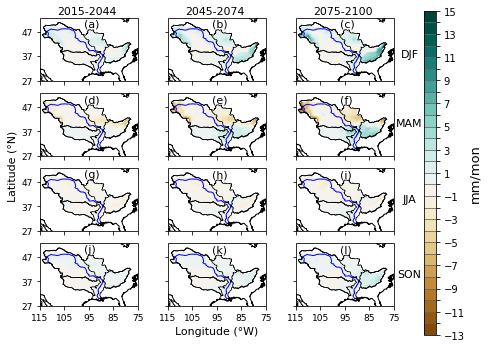

In [169]:

fraction_seasonMax = 1
nDiv_seasonMax = int(vmax_djfTot_scenEraThree - vmin_mamTot_scenEraThree + 1)


fontSize = 9
textFontVal = 11
legendFontSize = 10
titleFontVal = 11

cbarTickFontSize = 10
cbarTextFontSize = 13

linewidth = 0.7
#++++++++++++++++++++


# Plot for August
#   https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))


norm = MidpointNormalize(vmin=vmin_mamTot_scenEraThree, vmax=vmax_djfTot_scenEraThree+0, midpoint=0)
levels = np.linspace(vmin_mamTot_scenEraThree, vmax_djfTot_scenEraThree+0, int(nDiv_seasonMax/fraction_seasonMax)) # to draw 11 levels
boundaries=np.linspace(vmin_mamTot_scenEraThree,vmax_djfTot_scenEraThree+0, int(nDiv_seasonMax/fraction_seasonMax))

latTickLebelsStr = ['27', '37', '47', ]
lonTickLebelsStr = ['115', '105', '95', '85', '75',]

fig = plt.figure(figsize=(11, 5), constrained_layout=True)
axs = [plt.subplot(4, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(12)]

print(axs)
ax1 = axs[0]

cp1 = ax1.contourf(x_Us, y_Us,param_djfTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)
                              
plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax1.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
missi = cfeature.ShapelyFeature(basin_Missi, ccrs.PlateCarree())
arkansas = cfeature.ShapelyFeature(basin_Arkansas, ccrs.PlateCarree())
missouri = cfeature.ShapelyFeature(basin_Missouri, ccrs.PlateCarree())
ohio = cfeature.ShapelyFeature(basin_Ohio, ccrs.PlateCarree())

ax1.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax1.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax1.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax1.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax1.add_feature(cfeature.COASTLINE)

ax1.set_xlim([-115, -75])
ax1.set_ylim([27, 52.5])

ax1.set_yticks([27, 37, 47,]) 

ax1.set_xticks([ -115, -105, -95, -85, -75,]) 

latTickLebelsStr = ['27', '37', '47', ]


ax1.set_yticklabels(latTickLebelsStr, fontSize = fontSize)

ax1.set_xticklabels('', fontSize = fontSize)

ax1.set_title('(a)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

ax1.text(-108.0, 54, r'2015-2044', fontsize=titleFontVal)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
cp2 = ax2.contourf(x_Us, y_Us,param_djfTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p2 = ax2.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax2.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax2.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax2.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax2.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax2.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax2.add_feature(cfeature.COASTLINE)
ax2.set_xlim([-115, -75])
ax2.set_ylim([27, 52.5])

ax2.set_yticks([27, 37, 47,]) 

ax2.set_yticklabels('', fontSize = fontSize)

ax2.set_xticks([ -115, -105, -95, -85, -75,]) 

ax2.set_xticklabels('', fontSize = fontSize)

ax2.set_title('(b)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

ax2.text(-108.0, 54, r'2045-2074', fontsize=titleFontVal)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax3 = axs[2]
cp3 = ax3.contourf(x_Us, y_Us,param_djfTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax3.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax3.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax3.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax3.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax3.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax3.add_feature(cfeature.COASTLINE)
ax3.set_xlim([-115, -75])
ax3.set_ylim([27, 52.5])
ax3.set_yticks([27, 37, 47,]) 

ax3.set_yticklabels('', fontSize = fontSize)

ax3.set_xticks([ -115, -105, -95, -85, -75,]) 

ax3.set_xticklabels('', fontSize = fontSize)

ax3.set_title('(c)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')

ax3.text(-108.0, 54, r'2075-2100', fontsize=titleFontVal)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax4 = axs[3]
cp4 = ax4.contourf(x_Us, y_Us,param_mamTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax4.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax4.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax4.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax4.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax4.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax4.add_feature(cfeature.COASTLINE)

ax4.set_xlim([-115, -75])
ax4.set_ylim([27, 52.5])

ax4.set_yticks([27, 37, 47,]) 

ax4.set_xticks([ -115, -105, -95, -85, -75,]) 

ax4.set_yticklabels(latTickLebelsStr, fontSize = fontSize)

ax4.set_xticklabels('', fontSize = fontSize)


ax4.set_ylabel('Latitude (°N)', fontsize = textFontVal, y=-0.15)

ax4.set_title('(d)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax5 = axs[4]
cp5 = ax5.contourf(x_Us, y_Us,param_mamTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p5 = ax5.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax5.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax5.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax5.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax5.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax5.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax5.add_feature(cfeature.COASTLINE)
ax5.set_xlim([-115, -75])
ax5.set_ylim([27, 52.5])

ax5.set_yticks([27, 37, 47,]) 

ax5.set_yticklabels('', fontSize = fontSize)

ax5.set_xticks([ -115, -105, -95, -85, -75,]) 

ax5.set_xticklabels('', fontSize = fontSize)

ax5.set_title('(e)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
cp6 = ax6.contourf(x_Us, y_Us,param_mamTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax6.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax6.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax6.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax6.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax6.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax6.add_feature(cfeature.COASTLINE)
ax6.set_xlim([-115, -75])
ax6.set_ylim([27, 52.5])

ax6.set_yticks([27, 37, 47,]) 

ax6.set_yticklabels('', fontSize = fontSize)

ax6.set_xticks([ -115, -105, -95, -85, -75,]) 

ax6.set_xticklabels('', fontSize = fontSize)

ax6.set_title('(f)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax7 = axs[6]
cp7 = ax7.contourf(x_Us, y_Us,param_jjaTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax7.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax7.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax7.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax7.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax7.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax7.add_feature(cfeature.COASTLINE)

ax7.set_xlim([-115, -75])
ax7.set_ylim([27, 52.5])

ax7.set_yticks([27, 37, 47,]) 

ax7.set_xticks([ -115, -105, -95, -85, -75,]) 

ax7.set_yticklabels(latTickLebelsStr, fontSize = fontSize)

ax7.set_xticklabels('', fontSize = fontSize)

ax7.set_title('(g)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
cp8 = ax8.contourf(x_Us, y_Us,param_jjaTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p8 = ax8.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax8.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax8.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax8.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax8.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax8.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax8.add_feature(cfeature.COASTLINE)
ax8.set_xlim([-115, -75])
ax8.set_ylim([27, 52.5])

ax8.set_yticks([27, 37, 47,]) 

ax8.set_yticklabels('', fontSize = fontSize)

ax8.set_xticks([ -115, -105, -95, -85, -75,]) 

ax8.set_xticklabels('', fontSize = fontSize)

ax8.set_title('(h)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax9 = axs[8]
cp9 = ax9.contourf(x_Us, y_Us,param_jjaTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax9.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax9.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax9.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax9.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax9.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax9.add_feature(cfeature.COASTLINE)
ax9.set_xlim([-115, -75])
ax9.set_ylim([27, 52.5])

ax9.set_yticks([27, 37, 47,]) 

ax9.set_yticklabels('', fontSize = fontSize)

ax9.set_xticks([ -115, -105, -95, -85, -75,]) 

ax9.set_xticklabels('', fontSize = fontSize)

ax9.set_title('(i)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax10 = axs[9]
cp10 = ax10.contourf(x_Us, y_Us,param_sonTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax10.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax10.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax10.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax10.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax10.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax10.add_feature(cfeature.COASTLINE)

ax10.set_xlim([-115, -75])
ax10.set_ylim([27, 52.5])

ax10.set_yticks([27, 37, 47,]) 

ax10.set_xticks([ -115, -105, -95, -85, -75,]) 

ax10.set_yticklabels(latTickLebelsStr, fontSize = fontSize)
ax10.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)

ax10.set_title('(j)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax11 = axs[10]
cp11 = ax11.contourf(x_Us, y_Us,param_sonTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p11 = ax11.get_position().get_points().flatten()
cbax11 = fig.add_axes([p11[0]+0.18, +0.02, (p11[2]-p11[0])*0.12, 0.9])

cbar11 =plt.colorbar(cp11, ax=ax11, cax=cbax11, shrink=.5, ticks=boundaries, orientation = 'vertical') 

cbar11.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for label in cbar11.ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

cbar11.set_label("mm/mon", fontsize = cbarTextFontSize)


plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax11.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax11.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax11.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax11.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax11.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax11.add_feature(cfeature.COASTLINE)
ax11.set_xlim([-115, -75])
ax11.set_ylim([27, 52.5])

ax11.set_yticks([27, 37, 47,]) 

ax11.set_yticklabels('', fontSize = fontSize)

 
ax11.set_xticks([ -115, -105, -95, -85, -75,]) 

ax11.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)

ax11.set_xlabel('Longitude (°W)', fontsize = textFontVal)


ax11.set_title('(k)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax12 = axs[11]
cp12 = ax12.contourf(x_Us, y_Us,param_sonTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax12.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax12.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax12.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax12.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax12.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax12.add_feature(cfeature.COASTLINE)
ax12.set_xlim([-115, -75])

ax12.set_ylim([27, 52.5])

ax12.set_yticks([27, 37, 47,]) 

ax12.set_yticklabels('', fontSize = fontSize)

ax12.set_xticks([ -115, -105, -95, -85, -75,]) 

ax12.set_xticklabels(lonTickLebelsStr, fontSize = fontSize)

ax12.set_title('(l)', x = 0.45, y=1.08, pad=-14, fontsize = textFontVal,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.text(-65, 11, 'DJF', fontsize=titleFontVal)
plt.text(-76, 5, 'MAM', fontsize=titleFontVal)
plt.text(-61, -1.5, 'JJA', fontsize=titleFontVal)
plt.text(-72, -8, 'SON', fontsize=titleFontVal)


plt.subplots_adjust(left=0.13,
                    bottom=0.1,
                    right=0.6,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.2)
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)


#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\runoff\seasonal\tcfRunoffSeasMap.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\runoff\seasonal\tcfRunoffSeasMap.png', dpi=600)  


plt.show()

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [170]:
STOP here ===================

SyntaxError: invalid syntax (<ipython-input-170-f3db6e1961f9>, line 1)